# This notebook looks into creating a machine learning model for classifying breast cancer into either Malignant or Benign


In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
can_data = pd.read_csv('data/csv/Breast_Cancer_data_1.csv')

# EDA process



In [42]:
can_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
print(can_data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [44]:
can_data['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [45]:
can_data.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [46]:
can_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

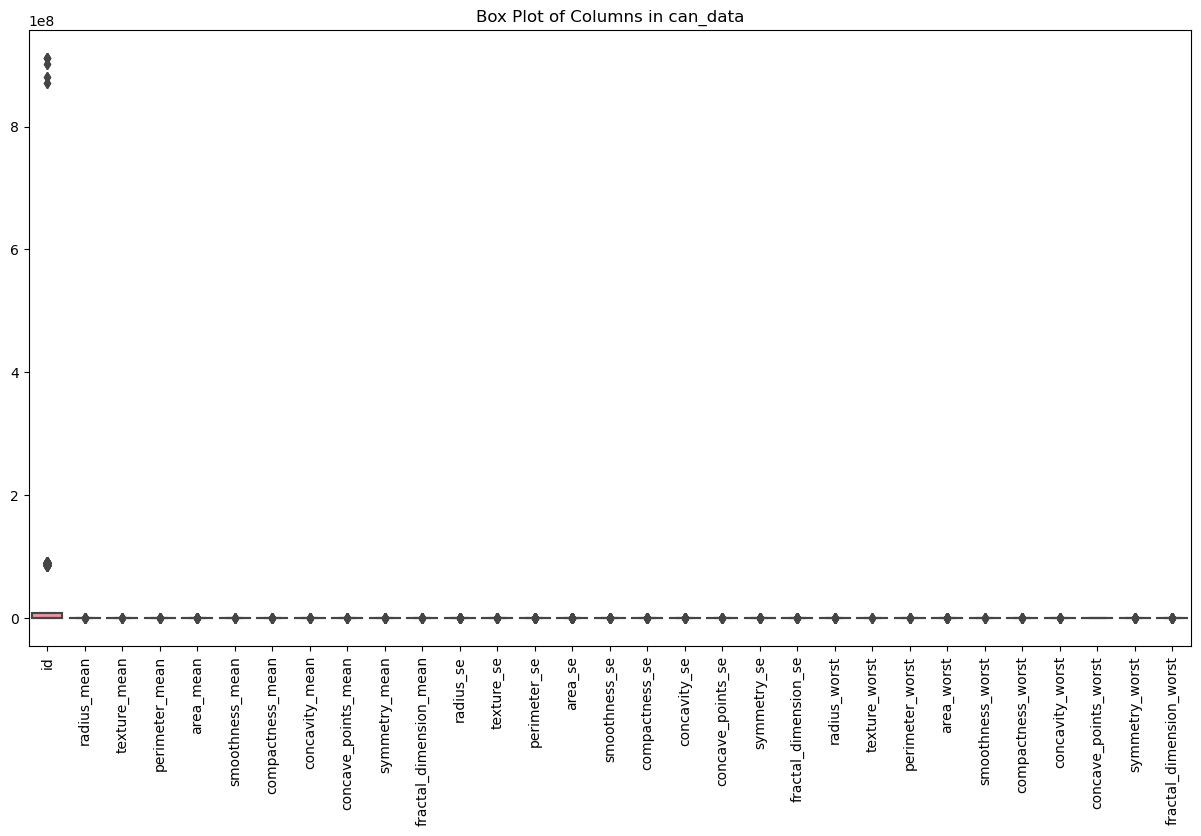

In [47]:
#check for outliers 
plt.figure(figsize=(15, 8))
sns.boxplot(data=can_data)
plt.title('Box Plot of Columns in can_data')
plt.xticks(rotation=90)
plt.show()

In [48]:
#dropping columns that are not in need
#column Id is not useful 
can_data.drop(columns = 'id', axis = 1, inplace = True)

In [49]:
#count the number of Malignant and number Benign
count_B = (can_data['diagnosis'] == 'B').sum()
count_M = (can_data['diagnosis'] == 'M').sum()
print("number of M values: ", count_M)
print("Number of B values: ", count_B)

number of M values:  212
Number of B values:  357


In [50]:
#change the 'diagnosis' column to something quantifiable
for i in range(len(can_data['diagnosis'])):
    if can_data['diagnosis'][i] == 'M':
        can_data['diagnosis'][i] = 1
    elif can_data['diagnosis'][i] == 'B':
        can_data['diagnosis'][i] = 0
can_data['diagnosis'].head()

C:\Users\amer_\AppData\Local\Temp\ipykernel_13016\1161023682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can_data['diagnosis'][i] = 1
C:\Users\amer_\AppData\Local\Temp\ipykernel_13016\1161023682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can_data['diagnosis'][i] = 0


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: object

In [51]:
count_1 = (can_data['diagnosis'] == 1).sum() #M
print("Number of 1 values:", count_1)

count_0 = (can_data['diagnosis'] == 0).sum() #B
print("Number of 0 values:", count_0)

total_count = count_0 + count_1
print("Total:", total_count)


Number of 1 values: 212
Number of 0 values: 357
Total: 569


# ML process. looking for best model

In [52]:
#load packages 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Accuracy & model measuring Packages 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, r2_score, mean_squared_error

#Model packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [53]:
X = can_data.drop(columns= 'diagnosis')
y = can_data['diagnosis'].values
y = y.astype('int') # convert y to integer
print(X.shape)
print(y.shape, y.dtype)


(569, 30)
(569,) int32


In [54]:
#split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
#logistic Regression 

logreg_pipeline = Pipeline([
    ('Scaler', MinMaxScaler()),    
    ('logistic_regression', LogisticRegression(random_state=42)) 
])


logreg_pipeline.fit(X_train, y_train)
predictions = logreg_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

r2 = r2_score(y_test, predictions)
print('R_Squared:', r2)

mse = mean_squared_error(y_test, predictions)
print('mean_squared_error:', mse)

Accuracy: 0.9824561403508771
R_Squared: 0.9253193580085162
mean_squared_error: 0.017543859649122806


In [56]:
# SVM 

svm_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),            # Standardize features
    ('svm', SVC(kernel='linear', C=1.0, random_state=42))  # Support Vector Machine model
])
svm_pipeline.fit(X_train, y_train)
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

r2 = r2_score(y_test, predictions)
print('R_Squared:', r2)

mse = mean_squared_error(y_test, predictions)
print('mean_squared_error:', mse)

Accuracy: 0.9824561403508771
R_Squared: 0.9253193580085162
mean_squared_error: 0.017543859649122806


In [57]:
#Random Forest
rf_pipeline = Pipeline([
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest model
])

rf_pipeline.fit(X_train, y_train)
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

r2 = r2_score(y_test, predictions)
print('R_Squared:', r2)

mse = mean_squared_error(y_test, predictions)
print('mean_squared_error:', mse)

Accuracy: 0.9649122807017544
R_Squared: 0.8506387160170324
mean_squared_error: 0.03508771929824561


In [58]:
#Gaussian Naive Bayes 
nb_pipeline = Pipeline([
    ('gaussian_nb', GaussianNB())  # Gaussian Naive Bayes model
])

nb_pipeline.fit(X_train, y_train)
predictions = nb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

r2 = r2_score(y_test, predictions)
print('R_Squared:', r2)

mse = mean_squared_error(y_test, predictions)
print('mean_squared_error:', mse)

Accuracy: 0.9736842105263158
R_Squared: 0.8879790370127743
mean_squared_error: 0.02631578947368421


Add Hyperparameter tuning

In [59]:
#Nest the pipeline and add GridSearchCV 
from sklearn.model_selection import GridSearchCV

# Define pipelines
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ])
}

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2', 'none'],
        'classifier__solver': ['liblinear', 'lbfgs'] 
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'Naive Bayes': {}  # No hyperparameters to tune for Naive Bayes
}

# Perform hyperparameter tuning and evaluation
for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Cross-Validation Score for {model_name}: {best_score:.4f}\n")

    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print("Model:", model_name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print()

c:\Users\amer_\.conda\envs\compass_env\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\amer_\.conda\envs\compass_env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\amer_\.conda\envs\compass_env\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\amer_\.conda\envs\compass_env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\amer_\.conda\envs\compass_env\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='no

Best Parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Cross-Validation Score for Logistic Regression: 0.9780

Model: Logistic Regression
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9767441860465116
F1-Score: 0.988235294117647

Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best Cross-Validation Score for Random Forest: 0.9582

Model: Random Forest
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-Score: 0.9523809523809524

Best Parameters for SVM: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best Cross-Validation Score for SVM: 0.9736

Model: SVM
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1-Score: 0.9761904761904763

Best Parameters for Naive Bayes: {}
Best Cross-Validation Score for Naive Bayes: 0.9341

Model: Naive Bayes
Accuracy: 0.9649122807017544
Precision: 0.975609

In [61]:
#choose the best model by creating a scoring system based on reducing false negatives

evaluation_metrics = {
    'logistic_regression': {'accuracy': 0.9912280701754386, 'precision': 1.0, 'recall': 0.9767441860465116, 'f1': 0.988235294117647},
    'svm': {'accuracy': 0.9824561403508771, 'precision': 1.0, 'recall': 0.9534883720930233, 'f1': 0.9761904761904763},
    'random_forest': {'accuracy': 0.9649122807017544, 'precision': 0.975609756097561, 'recall': 0.9302325581395349, 'f1': 0.9523809523809524},
    'gaussian_nb': {'accuracy': 0.9649122807017544, 'precision': 0.975609756097561, 'recall': 0.9302325581395349, 'f1': 0.9523809523809524}
}

composite_scores = {}
for model, metrics in evaluation_metrics.items():
    composite_scores[model] = ((0.2*metrics['precision']) + (0.8 * metrics['recall']))

best_model = max(composite_scores, key=composite_scores.get)
print("Best Model:", best_model)
print("Composite Score:", composite_scores[best_model])


Best Model: logistic_regression
Composite Score: 0.9813953488372094


composite score explanation
- Recall metric catches false negatives while precision catches false negatives.
- the equation takes into account of 80% of Recall score and 20% of precision score to choose the best model 
- the logic behind the equation is that it is better for the patient to catch false negatives than catching false positives as false negative means that the patients tumor is benign when it is malignant.
- malignant tumors are more sever than benign tumors
